In [1]:
import pandas as pd
import geopandas as geopd
# from jax import numpy as np
from openpyxl import load_workbook
from tqdm.notebook import tqdm
import shapely as sh
import math

import geopy
import geopy.distance

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
wb = load_workbook(filename = "Dataset/IntegrVelocity.xlsx")
data_velocity_lon = pd.read_excel("Dataset/IntegrVelocity.xlsx", header=None, sheet_name = wb.sheetnames[0])
data_velocity_lat = pd.read_excel("Dataset/IntegrVelocity.xlsx", header=None, sheet_name = wb.sheetnames[1])
data_weeks = [
    pd.read_excel("Dataset/IntegrVelocity.xlsx", header=None, sheet_name = wb.sheetnames[i]) for i in tqdm(range(2, len(wb.sheetnames)))
]

  0%|          | 0/14 [00:00<?, ?it/s]

In [3]:
def addKm(lat, lon, km, bearing):
  # Define starting point.
  start = geopy.Point(longitude=lon, latitude=lat)

  # Define a general distance object, initialized with a distance of 1 km.
  d = geopy.distance.distance(kilometers = km)

  # Use the `destination` method with a bearing of 0 degrees (which is north)
  # in order to go from point `start` 1 km to north.
  dest = d.destination(point=start, bearing=bearing)
  return dest.latitude, dest.longitude

def polygon(lat, lon):
    lat1, lon1 = lat, lon 
    lat2, lon2 = addKm(lat, lon, 25, 180)
    lat3, lon3 = addKm(lat, lon, 25, 90)
    lat4, lon4 = addKm(lat3, lon3, 25, 180)
    return sh.Polygon(((lon1, lat1), (lon3, lat3), (lon4, lat4), (lon2, lat2), (lon1, lat1))) #(lon1, lat1)))

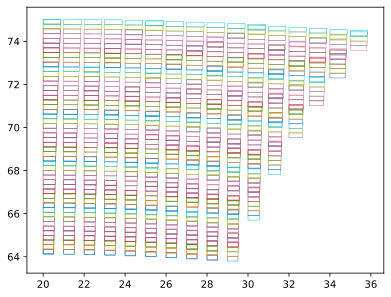

In [27]:
# for lon, lat in zip(data_velocity_lon, data_velocity_lat):

for i in range(20):
    for j in range(50):
        lat = data_velocity_lat[i][j]
        lon = data_velocity_lon[i][j]
        p = polygon(lat, lon)
        plt.plot(*p.exterior.xy, linewidth=0.5)

plt.show()

In [29]:
p = polygon(90, 200)
print(p)

POLYGON ((200 90, -70 89.77617413772617, -70 89.55234820639217, -160 89.77617413772617, 200 90))


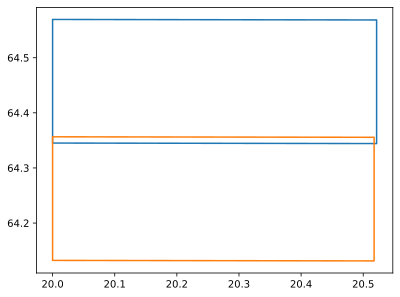

In [5]:

# plt.savefig()


lat = data_velocity_lat[0][0]
lon = data_velocity_lon[0][0]

lat1 = data_velocity_lat[1][1]
lon1 = data_velocity_lon[1][1]

p1 = polygon(lat1, lon1)
p = polygon(lat, lon)

# print(p)
# # p.plot()
plt.plot(*p1.exterior.xy)
plt.plot(*p.exterior.xy)
plt.show()

In [13]:
data_weeks[0][110:140]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,216
110,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
111,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
112,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
113,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
114,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
115,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
116,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
117,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
118,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
119,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10


In [21]:
data_velocity_lon[110:120][0]

110     20
111     20
112     20
113     20
114     20
115     20
116    200
117    200
118    200
119    200
Name: 0, dtype: int64

In [20]:
# col = data_velocity_lat[:][0]
# col[col == 90]
data_velocity_lat[110:120][0]

110    88.6511
111    88.8759
112    89.1007
113    89.3255
114    89.5503
115    89.7752
116    90.0000
117    89.7752
118    89.5503
119    89.3255
Name: 0, dtype: float64

In [6]:
wb = load_workbook(filename = "Dataset/ГрафДанные.xlsx")

data_graph_points = pd.read_excel("Dataset/ГрафДанные.xlsx", sheet_name = wb.sheetnames[0])
data_graph_points = data_graph_points.drop(["Unnamed: 5", "Unnamed: 6"], axis=1)

data_graph_edges = pd.read_excel("Dataset/ГрафДанные.xlsx", sheet_name = wb.sheetnames[1])
data_graph_edges = data_graph_edges.drop(["Unnamed: 6", "Unnamed: 7"], axis=1)

In [7]:
wb = load_workbook(filename = "Dataset/Расписание движения судов.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Расписание движения судов.xlsx'

In [19]:
data_move = pd.read_excel("Dataset/Расписание движения судов.xlsx")
data_move_1 = data_move.iloc[:42]
data_move_2 = data_move.iloc[44:49].drop(["Название судна", "Ледовый класс"], axis=1)
old_names = list(data_move_2.columns)
new_names = list(data_move_2.values[0])
mapping = {old_name: new_name for old_name, new_name in zip(old_names, new_names)}
data_move_2 = data_move_2.rename(columns=mapping)[1:]

In [39]:
map_1 = geopd.read_file("Dataset/GOaS_v1_20211214/Simpl")

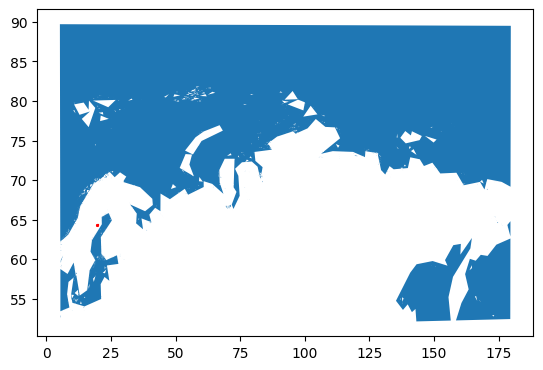

In [41]:
map_1.plot()
y, x = p.exterior.xy
plt.plot(x, y, color="red")
plt.show()

In [21]:
map_1

,fid,name,latitude,longitude,min_Y,min_X,max_Y,max_X,area_km2,geometry
0,1.0,North Pacific Ocean,26.95013,-169.38334,0.0,117.51622,66.56286,-76.98544,77124830.0,"MULTIPOLYGON (((179.50939 62.86832, 178.33297 ..."


<Axes: >

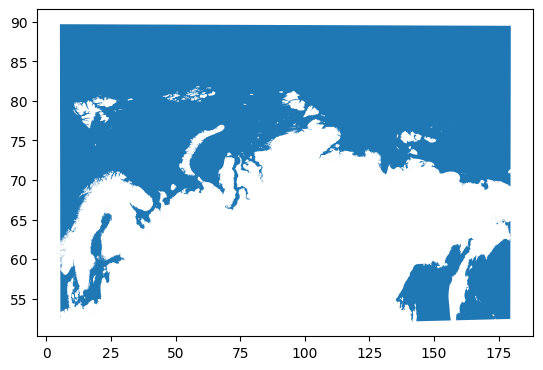

In [11]:
map_2 = geopd.read_file("GOaS_v1_20211214/Clip")
map_2.plot()

<Axes: >

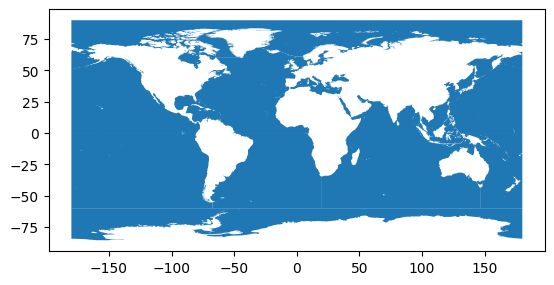

In [13]:
map_3 = geopd.read_file("GOaS_v1_20211214")
map_3.plot()